# clustering example

## problem statement

- find the groups/clusters in the dataset

### import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### exploratory data analysis

In [5]:
# rename the columns
df.rename({"Annual Income (k$)": "income", "Spending Score (1-100)": "expense"}, axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   income   200 non-null    int64
 1   expense  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [7]:
df.drop(['CustomerID', 'Gender', 'Age'], axis=1, inplace=True)

### data visulization

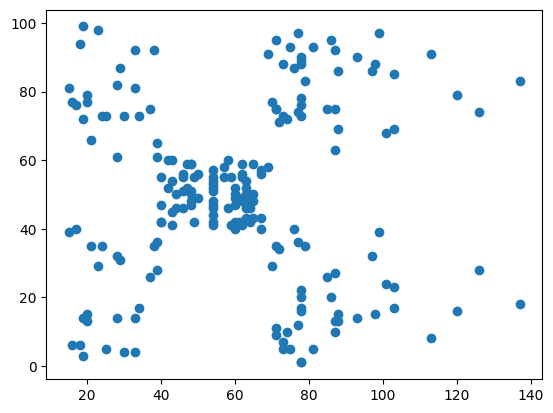

In [9]:
plt.scatter(df['income'], df['expense'])

### clustering the data using KMean-clustering

In [10]:
# number of clusters = 5
k = 5

In [12]:
from sklearn.cluster import KMeans

# create cluster
kmeans = KMeans(n_clusters=k)

# fit the data
kmeans.fit(df)

KMeans(n_clusters=5)

In [13]:
kmeans.cluster_centers_

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571]])

In [14]:
kmeans.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 1, 4, 1, 4, 1,
       2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

### visualize the clusters

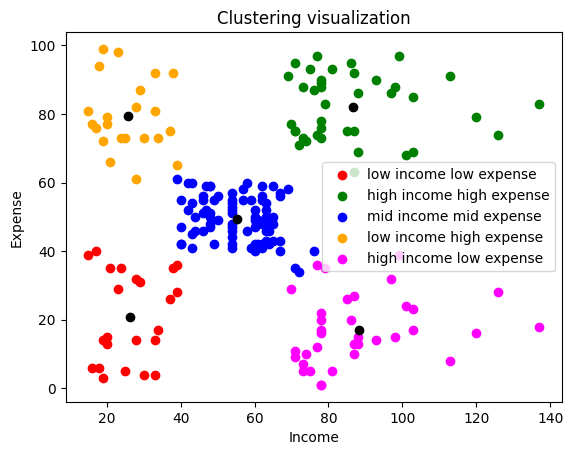

In [24]:
# create clusters
plt.scatter(df['income'][kmeans.labels_ == 0], df['expense'][kmeans.labels_ == 0], color="red", label="low income low expense")
plt.scatter(df['income'][kmeans.labels_ == 1], df['expense'][kmeans.labels_ == 1], color="green", label="high income high expense")
plt.scatter(df['income'][kmeans.labels_ == 2], df['expense'][kmeans.labels_ == 2], color="blue", label="mid income mid expense")
plt.scatter(df['income'][kmeans.labels_ == 3], df['expense'][kmeans.labels_ == 3], color="orange", label="low income high expense")
plt.scatter(df['income'][kmeans.labels_ == 4], df['expense'][kmeans.labels_ == 4], color="magenta", label="high income low expense")

# add centroids
plt.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], color="black")
plt.scatter(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], color="black")
plt.scatter(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], color="black")
plt.scatter(kmeans.cluster_centers_[3][0], kmeans.cluster_centers_[3][1], color="black")
plt.scatter(kmeans.cluster_centers_[4][0], kmeans.cluster_centers_[4][1], color="black")

plt.xlabel("Income")
plt.ylabel("Expense")
plt.title("Clustering visualization")
plt.legend()

In [28]:
df, kmeans.labels_

(     income  expense
 0        15       39
 1        15       81
 2        16        6
 3        16       77
 4        17       40
 ..      ...      ...
 195     120       79
 196     126       28
 197     126       74
 198     137       18
 199     137       83
 
 [200 rows x 2 columns],
 array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
        0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2,
        0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 1, 4, 1, 4, 1,
        2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
        4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
        4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
        4, 1], dtype=int32))